<a href="https://colab.research.google.com/github/anhduong77/CustomerSatisfaction/blob/main/notebook/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CustomerSatisfaction/archive/merged_data.csv', index_col='order_id')

In [ ]:
data

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_city,seller_state,seller_lat,seller_lng,total_items,total_price,total_freight,review_score,total_payment_value
order_id,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,-23.576983,-46.587161,maua,SP,-23.680729,-46.444238,1.0,29.99,8.72,4,38.71
53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,47813,barreiras,BA,-12.177924,-44.660711,belo horizonte,SP,-19.807681,-43.980427,1.0,118.70,22.76,4,141.46
47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,75265,vianopolis,GO,-16.745150,-48.514783,guariba,SP,-21.363502,-48.229601,1.0,159.90,19.22,5,179.12
949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,59296,sao goncalo do amarante,RN,-5.774190,-35.271143,belo horizonte,MG,-19.837682,-43.924053,1.0,45.00,27.20,5,72.20
ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,9195,santo andre,SP,-23.676370,-46.514627,mogi das cruzes,SP,-23.543395,-46.262086,1.0,19.90,8.72,5,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,12209,sao jose dos campos,SP,-23.178000,-45.883818,braganca paulista,SP,-22.961694,-46.523854,1.0,72.00,13.08,5,85.08
63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,11722,praia grande,SP,-24.001500,-46.449864,tupa,SP,-21.930548,-50.498348,1.0,174.90,20.10,4,195.00
83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,45920,nova vicosa,BA,-17.898358,-39.373630,sao paulo,SP,-23.553642,-46.452661,1.0,205.99,65.02,5,271.01


#1. Data quality

In [ ]:
print("Number of rows and columns: ",  data.shape)

Number of rows and columns:  (98673, 20)


In [ ]:
# Missing value
df_null = data.isnull().sum().to_frame()
df_null['missing_percentage'] = (df_null[0] / data.shape[0]) * 100
df_null.sort_values(by='missing_percentage', ascending=False, inplace=True)
print(df_null)
print("--------------------------------------")
print("Total features with missing values:", df_null[df_null[0] > 0].shape[0])
print("Total features with no missing values:", df_null[df_null[0] == 0].shape[0])

                                  0  missing_percentage
order_delivered_customer_date  2843            2.881234
order_delivered_carrier_date   1746            1.769481
seller_lat                      973            0.986085
seller_lng                      973            0.986085
seller_city                     756            0.766167
seller_state                    756            0.766167
total_price                     756            0.766167
total_items                     756            0.766167
total_freight                   756            0.766167
customer_lng                    276            0.279712
customer_lat                    276            0.279712
order_approved_at               155            0.157085
total_payment_value               1            0.001013
order_status                      0            0.000000
order_purchase_timestamp          0            0.000000
customer_zip_code_prefix          0            0.000000
order_estimated_delivery_date     0            0

In [ ]:
num_cols = data.select_dtypes(include='number').columns.tolist()
cat_cols = data.select_dtypes(exclude='number').columns.tolist()
date_cols = [x for x in cat_cols if x.split("_")[-1] in ['timestamp', 'at', 'date']]
cat_cols = [x for x in cat_cols if x not in date_cols]
target = 'review_score'
num_cols.remove(target)

=> Require a suitable missing value treatment before do casual inference or ML model

# 2. EDA

## 2.1 Target analysis

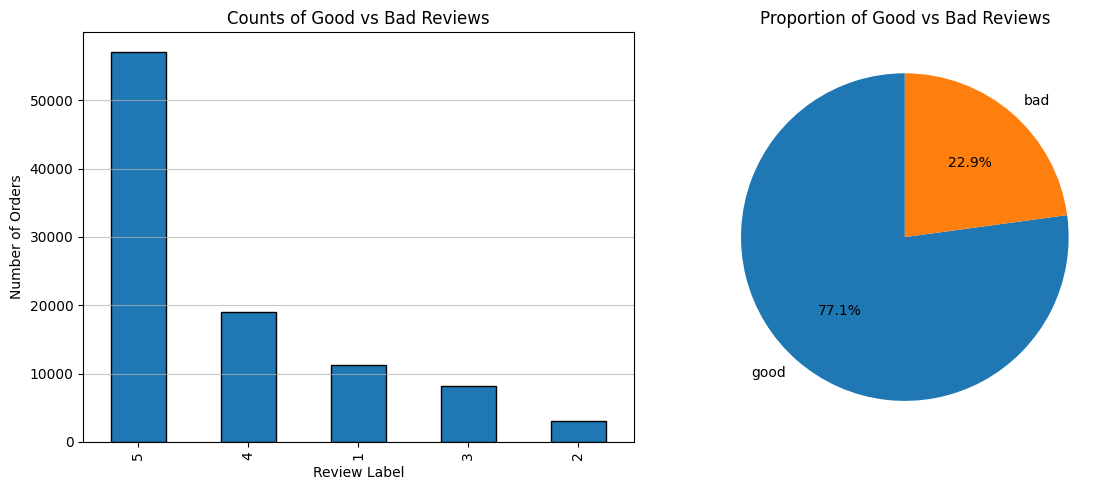

In [ ]:
import matplotlib.pyplot as plt

# Assume 'target' is 'review_score' in your dataframe
target = 'review_score'

# Step 1: Create a new column for good/bad
data['review_label'] = data[target].apply(lambda x: 'bad' if x in [1, 2, 3] else 'good')

# Step 2: Prepare counts and proportions
counts = data['review_label'].value_counts()
proportions = data['review_label'].value_counts(normalize=True)

# Step 3: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart - counts
data['review_score'].value_counts().plot(kind='bar', ax=axes[0], edgecolor='black')
axes[0].set_title("Counts of Good vs Bad Reviews")
axes[0].set_xlabel("Review Label")
axes[0].set_ylabel("Number of Orders")
axes[0].grid(axis='y', alpha=0.7)

# Pie chart - proportions
proportions.plot(kind='pie', labels=proportions.index, autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_ylabel("")  # Remove default ylabel
axes[1].set_title("Proportion of Good vs Bad Reviews")

plt.tight_layout()
plt.show()


=> Previous features include some minority class like 2 star for example, which roughly equal 1/6 of the majority class, so I decide to group it into bad score and good score in the right plot

## 2.2 Numeric feature analysis

### 2.2.1 Univariate analysis
In this part, we  focus on the technical problem on numerical features like outlier and their distribution in general.

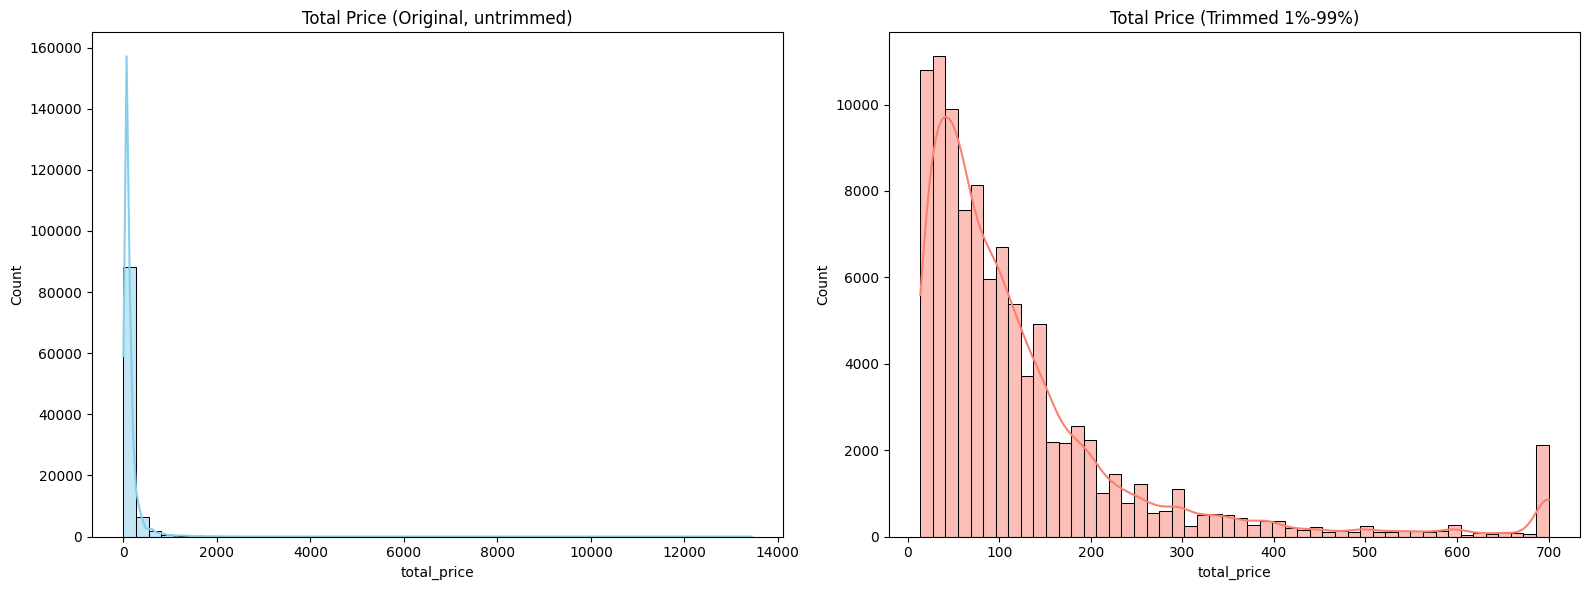

In [ ]:
# Calculate percentiles for trimming
lower = data['total_price'].quantile(0.02)
upper = data['total_price'].quantile(0.98)

# Trimmed total_price
total_price_trimmed = data['total_price'].clip(lower, upper)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(data['total_price'], bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Total Price (Original, untrimmed)")

# Trimmed
sns.histplot(total_price_trimmed, bins=50, kde=True, color='salmon', ax=axes[1])
axes[1].set_title("Total Price (Trimmed 1%-99%)")

plt.tight_layout()
plt.show()

- Data do exist some features with extreme value in which distort distribution of data. For example, in this case, extreme value 14000 likely skew the tail of distribution toward right.

### 2.2.3 Multivariate analysis

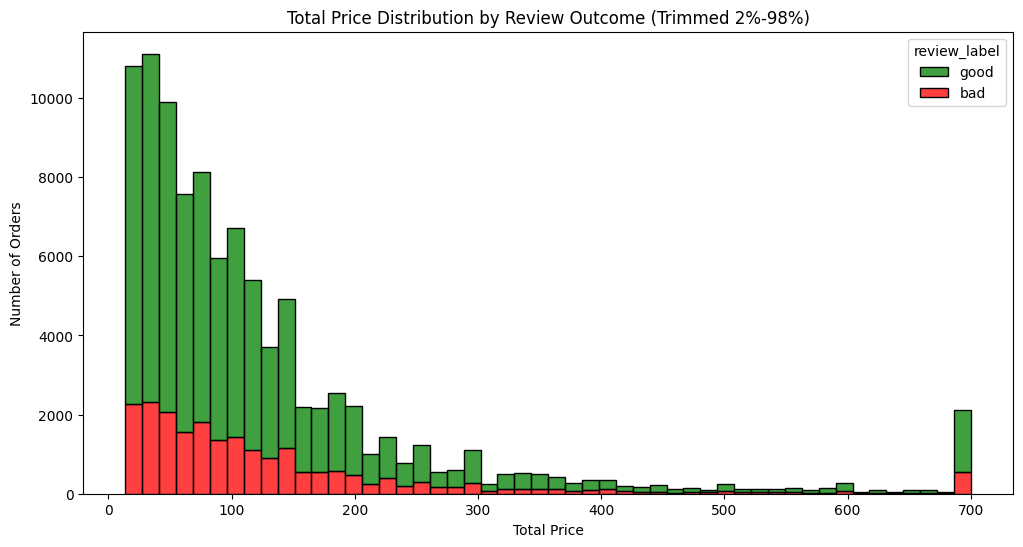

In [ ]:
trimmed_price_df = data[['total_price', 'review_label']].copy()
trimmed_price_df['total_price_trimmed'] = trimmed_price_df['total_price'].clip(lower, upper)
trimmed_price_df = trimmed_price_df.reset_index(drop=True)  # important!

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(
    data=trimmed_price_df,
    x='total_price_trimmed',
    hue='review_label',
    bins=50,
    palette={'good':'green','bad':'red'},
    multiple='stack',
    edgecolor='black'
)
plt.title("Total Price Distribution by Review Outcome (Trimmed 2%-98%)")
plt.xlabel("Total Price")
plt.ylabel("Number of Orders")
plt.show()


The distribution of bad score and good score based on feature price appear to be nearly the same which suggest that this is not a strong feature to seperate data into two classes

## 3.2 Categorical features

In [ ]:
cat_df = []
for col in cat_cols:
  cat_df.append({'feature': col,
                 'cardinality': data[col].nunique(),
                 'values': data[col].unique()})
pd.DataFrame(cat_df)

,feature,cardinality,values
0,order_status,8,"[delivered, invoiced, shipped, processing, una..."
1,customer_city,4117,"[sao paulo, barreiras, vianopolis, sao goncalo..."
2,customer_state,27,"[SP, BA, GO, RN, PR, RS, RJ, MG, SC, RR, PE, T..."
3,seller_city,611,"[maua, belo horizonte, guariba, mogi das cruze..."
4,seller_state,23,"[SP, MG, ES, RS, DF, PR, SC, RJ, GO, BA, nan, ..."


- As you can see, there exists some feature with high cardinality => require a different treatment for them so that they do not increase noise in data

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Top N + Other helper
def top_n_other(series, n=3):
    top_n = series.value_counts().nlargest(n).index
    return series.apply(lambda x: x if x in top_n else 'Other')

# Apply top_n_other
data['customer_city_label'] = top_n_other(data['customer_city'], n=3)
data['seller_city_label'] = top_n_other(data['seller_city'], n=3)

# Aggregate counts
cust_city_counts = data.groupby('customer_city_label').size().reset_index(name='order_count')
seller_city_counts = data.groupby('seller_city_label').size().reset_index(name='order_count')


In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top Customer Cities", "Top Seller Cities")
)

# Customer cities bar
fig.add_trace(
    go.Bar(
        x=cust_city_counts['customer_city_label'],
        y=cust_city_counts['order_count'],
        text=cust_city_counts['order_count'],
        name='Customer City',
        marker_color='indianred'
    ),
    row=1, col=1
)

# Seller cities bar
fig.add_trace(
    go.Bar(
        x=seller_city_counts['seller_city_label'],
        y=seller_city_counts['order_count'],
        text=seller_city_counts['order_count'],
        name='Seller City',
        marker_color='lightsalmon'
    ),
    row=1, col=2
)

# Layout
fig.update_layout(
    title_text="Top 3 Cities + Other for Customers and Sellers",
    showlegend=False,
    height=500, width=1000
)

fig.show()
